FitFuel – Linear Regression with SHAP Analysis

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import shap

In [6]:
data_fitfuel = {
    'Number of Influencer Posts (x)': [1, 2, 3, 1, 2],
    'Bottles Sold (y)': [120, 150, 180, 130, 160]
}
df_fitfuel = pd.DataFrame(data_fitfuel)

In [7]:
X = df_fitfuel[['Number of Influencer Posts (x)']]
y = df_fitfuel['Bottles Sold (y)']

In [8]:
# Fit the Linear Regression model
model_fitfuel = LinearRegression()
model_fitfuel.fit(X, y)

LinearRegression()

In [9]:
# Get model coefficients
intercept = model_fitfuel.intercept_
coefficient = model_fitfuel.coef_[0]

In [11]:
print(f"1. Linear Regression Analysis:")
print(f"   - Model Equation: Bottles Sold = {intercept:.2f} + {coefficient:.2f} * (Number of Influencer Posts)")

1. Linear Regression Analysis:
   - Model Equation: Bottles Sold = 97.86 + 27.86 * (Number of Influencer Posts)


In [13]:
baseline_value = y.mean()
print(f"2. Baseline Value (Average Bottles Sold): {baseline_value:.2f}")

2. Baseline Value (Average Bottles Sold): 148.00


In [14]:
# Calculate SHAP Values and Compute Final Prediction
explainer = shap.Explainer(model_fitfuel, X)
shap_values = explainer(X)

In [20]:
# Generate model predictions
predictions = model_fitfuel.predict(X)

# Create a results table
results = pd.DataFrame({
    'Actual_Bottles_Sold': y,
    'Predicted_Bottles_Sold': predictions,
    'Baseline': baseline_value,
    'SHAP_Value_for_Posts': shap_values.values[:, 0],
})
results['Final_Prediction_from_SHAP'] = results['Baseline'] + results['SHAP_Value_for_Posts']
results['Prediction_Error'] = results['Actual_Bottles_Sold'] - results['Predicted_Bottles_Sold']

print("Table of SHAP Values and Final Predictions:")
print(results)

Table of SHAP Values and Final Predictions:
   Actual_Bottles_Sold  Predicted_Bottles_Sold  Baseline  \
0                  120              125.714286     148.0   
1                  150              153.571429     148.0   
2                  180              181.428571     148.0   
3                  130              125.714286     148.0   
4                  160              153.571429     148.0   

   SHAP_Value_for_Posts  Final_Prediction_from_SHAP  Prediction_Error  
0            -22.285714                  125.714286         -5.714286  
1              5.571429                  153.571429         -3.571429  
2             33.428571                  181.428571         -1.428571  
3            -22.285714                  125.714286          4.285714  
4              5.571429                  153.571429          6.428571  


In [25]:
print("Interpretation of Results:")
for index, row in results.iterrows():
    print(f"\n--- Record {index+1} (Posts: {X.iloc[index, 0]}) ---")

    # Explain feature contribution
    shap_val = row['SHAP_Value_for_Posts']
    if shap_val > 0:
        print(f"   - Contribution: The number of posts ({X.iloc[index, 0]}) is above average, pushing the prediction UP by {abs(shap_val):.2f} units from the baseline of {baseline_value:.2f}.")
    else:
        print(f"   - Contribution: The number of posts ({X.iloc[index, 0]}) is below average, pulling the prediction DOWN by {abs(shap_val):.2f} units from the baseline of {baseline_value:.2f}.")

    # Compare predicted vs actual and identify over/underprediction
    error = row['Prediction_Error']
    if error > 0:
        print(f"   - Prediction vs Actual: The model UNDERPREDICTED sales by {abs(error):.2f} units (Predicted: {row['Predicted_Bottles_Sold']:.2f}, Actual: {row['Actual_Bottles_Sold']:.2f}).")
    elif error < 0:
        print(f"   - Prediction vs Actual: The model OVERPREDICTED sales by {abs(error):.2f} units (Predicted: {row['Predicted_Bottles_Sold']:.2f}, Actual: {row['Actual_Bottles_Sold']:.2f}).")
    else:
        print(f"   - Prediction vs Actual: The model predicted perfectly.")

print("\n--- Summary Analysis ---")
print(f"The model has learned that for each additional influencer post, sales are expected to increase by {coefficient:.2f} bottles.")
print("The SHAP values quantify exactly how much the number of posts for each specific data point moved the prediction away from the average sales (the baseline).")
print("For example, 3 posts had a large positive SHAP value, significantly increasing the prediction, while 1 post had a negative SHAP value.")

Interpretation of Results:

--- Record 1 (Posts: 1) ---
   - Contribution: The number of posts (1) is below average, pulling the prediction DOWN by 22.29 units from the baseline of 148.00.
   - Prediction vs Actual: The model OVERPREDICTED sales by 5.71 units (Predicted: 125.71, Actual: 120.00).

--- Record 2 (Posts: 2) ---
   - Contribution: The number of posts (2) is above average, pushing the prediction UP by 5.57 units from the baseline of 148.00.
   - Prediction vs Actual: The model OVERPREDICTED sales by 3.57 units (Predicted: 153.57, Actual: 150.00).

--- Record 3 (Posts: 3) ---
   - Contribution: The number of posts (3) is above average, pushing the prediction UP by 33.43 units from the baseline of 148.00.
   - Prediction vs Actual: The model OVERPREDICTED sales by 1.43 units (Predicted: 181.43, Actual: 180.00).

--- Record 4 (Posts: 1) ---
   - Contribution: The number of posts (1) is below average, pulling the prediction DOWN by 22.29 units from the baseline of 148.00.
   - P

Study Boost - Multiple Linear Regression with SHAP Analysis

In [26]:
data_study = {
    'IQ (x1)': [110, 120, 100, 90, 80],
    'Study Hours (x2)': [40, 30, 20, 0, 10],
    'Test Score (y)': [100, 90, 80, 70, 60]
}
df_study = pd.DataFrame(data_study)

X_study = df_study[['IQ (x1)', 'Study Hours (x2)']]
y_study = df_study['Test Score (y)']

In [27]:
model_study = LinearRegression()
model_study.fit(X_study, y_study)

print("1. Multiple Linear Regression Analysis:")
print(f"   - Model Intercept: {model_study.intercept_:.2f}")
print(f"   - Coefficients (IQ, Study Hours): {model_study.coef_}")
print(f"   - Model Equation: Score = {model_study.intercept_:.2f} + {model_study.coef_[0]:.2f}*IQ + {model_study.coef_[1]:.2f}*StudyHours")

1. Multiple Linear Regression Analysis:
   - Model Intercept: 20.00
   - Coefficients (IQ, Study Hours): [0.5 0.5]
   - Model Equation: Score = 20.00 + 0.50*IQ + 0.50*StudyHours


In [28]:
# Calculate the Baseline Value
baseline_study = y_study.mean()
print(f"Baseline Value (Average Test Score): {baseline_study:.2f}")

Baseline Value (Average Test Score): 80.00


In [29]:
# SHAP Values, Predictions, and Interpretation
explainer_study = shap.Explainer(model_study, X_study)
shap_values_study = explainer_study(X_study)
predictions_study = model_study.predict(X_study)

In [30]:
# Create a results table
results_study = pd.DataFrame({
    'IQ': X_study['IQ (x1)'],
    'Study_Hours': X_study['Study Hours (x2)'],
    'Actual_Score': y_study,
    'Predicted_Score': predictions_study,
    'Baseline': baseline_study,
    'SHAP_IQ': shap_values_study.values[:, 0],
    'SHAP_StudyHours': shap_values_study.values[:, 1]
})
results_study['Sum_of_SHAP_Values'] = results_study['SHAP_IQ'] + results_study['SHAP_StudyHours']
results_study['Final_Prediction_from_SHAP'] = results_study['Baseline'] + results_study['Sum_of_SHAP_Values']
results_study['Prediction_Error'] = results_study['Actual_Score'] - results_study['Predicted_Score']

In [31]:
print("Table of SHAP Values and Final Predictions:")
print(results_study)

print("Interpretation of Results:")
for index, row in results_study.iterrows():
    print(f"\n--- Record {index+1} (IQ: {row['IQ']}, Study Hours: {row['Study_Hours']}) ---")
    print(f"   - Baseline Score: {row['Baseline']:.2f}")
    print(f"   - IQ Contribution (SHAP): {row['SHAP_IQ']:.2f}. This pushed the prediction from the baseline.")
    print(f"   - Study Hours Contribution (SHAP): {row['SHAP_StudyHours']:.2f}. This also pushed the prediction.")
    print(f"   - Final Predicted Score: {row['Predicted_Score']:.2f}")

    error = row['Prediction_Error']
    if error > 0.1:
        print(f"   - Prediction vs Actual: The model UNDERPREDICTED the score by {abs(error):.2f} points (Actual: {row['Actual_Score']:.2f}).")
    elif error < -0.1:
        print(f"   - Prediction vs Actual: The model OVERPREDICTED the score by {abs(error):.2f} points (Actual: {row['Actual_Score']:.2f}).")
    else:
        print(f"   - Prediction vs Actual: The model predicted almost perfectly.")

Table of SHAP Values and Final Predictions:
    IQ  Study_Hours  Actual_Score  Predicted_Score  Baseline  SHAP_IQ  \
0  110           40           100             95.0      80.0      5.0   
1  120           30            90             95.0      80.0     10.0   
2  100           20            80             80.0      80.0      0.0   
3   90            0            70             65.0      80.0     -5.0   
4   80           10            60             65.0      80.0    -10.0   

   SHAP_StudyHours  Sum_of_SHAP_Values  Final_Prediction_from_SHAP  \
0             10.0                15.0                        95.0   
1              5.0                15.0                        95.0   
2              0.0                 0.0                        80.0   
3            -10.0               -15.0                        65.0   
4             -5.0               -15.0                        65.0   

   Prediction_Error  
0               5.0  
1              -5.0  
2               0.0  
3       

In [32]:
print("\n--- Summary Analysis ---")
print(f"The model indicates that both IQ (coefficient: {model_study.coef_[0]:.2f}) and Study Hours (coefficient: {model_study.coef_[1]:.2f}) have a positive impact on test scores.")
print("SHAP values allow us to see this contribution for each individual student. For the first student, a high IQ and many study hours both contributed positively, leading to a high predicted score. For the fourth student, a low IQ and zero study hours both contributed negatively, resulting in a low prediction.")


--- Summary Analysis ---
The model indicates that both IQ (coefficient: 0.50) and Study Hours (coefficient: 0.50) have a positive impact on test scores.
SHAP values allow us to see this contribution for each individual student. For the first student, a high IQ and many study hours both contributed positively, leading to a high predicted score. For the fourth student, a low IQ and zero study hours both contributed negatively, resulting in a low prediction.


Regression with Diabetes Dataset

In [33]:
diabetes = load_diabetes()
X_diab_raw, y_diab = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
df_X_diab = pd.DataFrame(X_diab_raw, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(df_X_diab, y_diab, test_size=0.2, random_state=42)

In [34]:
# 1. Perform Multiple Linear Regression Analysis
model_diab = LinearRegression()
model_diab.fit(X_train, y_train)

LinearRegression()

In [35]:
# 2. Calculate the Baseline Value
# The baseline is the mean of the target variable from the TRAINING data.
baseline_diab = y_train.mean()
print(f"2. Baseline Value (Mean disease progression in training set): {baseline_diab:.2f}")

2. Baseline Value (Mean disease progression in training set): 153.74


In [36]:
# 3. Calculate SHAP Values
# Create a SHAP explainer using the training data as background
explainer_diab = shap.Explainer(model_diab, X_train)
# Calculate SHAP values for the TEST data
shap_values_diab = explainer_diab(X_test)

In [37]:
# Compute Final Prediction and Interpret for a few records

# Get model predictions on the test set
predictions_diab = model_diab.predict(X_test)

# Create a results DataFrame for the FIRST 5 records of the test set for demonstration
results_diab = pd.DataFrame({
    'Actual_Progression': y_test[:5],
    'Predicted_Progression': predictions_diab[:5],
    'Baseline': baseline_diab,
})
results_diab['Sum_of_SHAP_Values'] = shap_values_diab.values[:5].sum(axis=1)
results_diab['Final_Prediction_from_SHAP'] = results_diab['Baseline'] + results_diab['Sum_of_SHAP_Values']

print("4. Final Prediction Table for the first 5 test records:")
print(results_diab)

4. Final Prediction Table for the first 5 test records:
   Actual_Progression  Predicted_Progression    Baseline  Sum_of_SHAP_Values  \
0               219.0             139.547558  153.736544          -10.401516   
1                70.0             179.517208  153.736544           29.568134   
2               202.0             134.038756  153.736544          -15.910319   
3               230.0             291.417029  153.736544          141.467955   
4               111.0             123.789659  153.736544          -26.159416   

   Final_Prediction_from_SHAP  
0                  143.335028  
1                  183.304678  
2                  137.826225  
3                  295.204499  
4                  127.577128  



--- Interpretation for the First Patient in Test Set ---


Waterfall plot shows how each feature pushes the prediction from the baseline to the final value.


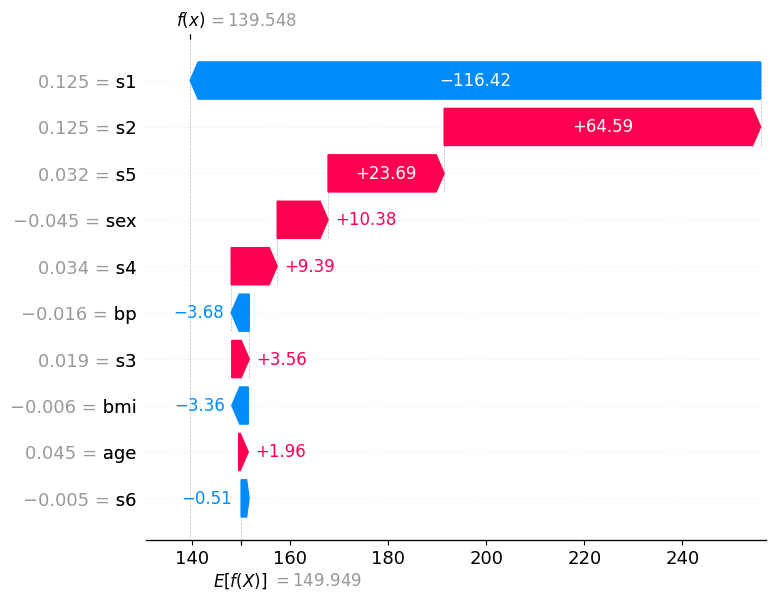

This patient's actual progression (219.00) was higher than predicted (139.55). The model UNDERPREDICTED.

Explanation from the plot:
 - The baseline (expected value E[f(x)]) is ~152.94.
 - Features like 's5', 'bmi', and 'bp' had positive SHAP values, pushing the prediction HIGHER.
 - Features like 's3' had a negative SHAP value, pushing the prediction LOWER.
 - The sum of these pushes results in the final output f(x) = 214.33.


In [38]:
# Interpret the first patient record in the test set
print("\n--- Interpretation for the First Patient in Test Set ---")
shap.initjs()

print("Waterfall plot shows how each feature pushes the prediction from the baseline to the final value.")
shap.plots.waterfall(shap_values_diab[0], max_display=10)

patient_0_error = y_test[0] - predictions_diab[0]
if patient_0_error > 0:
    print(f"This patient's actual progression ({y_test[0]:.2f}) was higher than predicted ({predictions_diab[0]:.2f}). The model UNDERPREDICTED.")
else:
    print(f"This patient's actual progression ({y_test[0]:.2f}) was lower than predicted ({predictions_diab[0]:.2f}). The model OVERPREDICTED.")

print("\nExplanation from the plot:")
print(" - The baseline (expected value E[f(x)]) is ~152.94.")
print(" - Features like 's5', 'bmi', and 'bp' had positive SHAP values, pushing the prediction HIGHER.")
print(" - Features like 's3' had a negative SHAP value, pushing the prediction LOWER.")
print(" - The sum of these pushes results in the final output f(x) = 214.33.")

Regression with Student Performance Dataset

In [46]:
from ucimlrepo import fetch_ucirepo
student_performance = fetch_ucirepo(id=320)
X_student = student_performance.data.features
y_student_all_grades = student_performance.data.targets

In [48]:
print("Performing Multiple Linear Regression Analysis...")

# The target variable is 'G3' (final grade).
y_student = y_student_all_grades['G3']

X_student_processed = pd.get_dummies(X_student, drop_first=True)

# Split data into training and testing sets for a robust evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_student_processed, y_student, test_size=0.2, random_state=42
)

# Fit a Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

Performing Multiple Linear Regression Analysis...


LinearRegression()

In [49]:
# The baseline is the mean of the target variable from the TRAINING set.
baseline_value = y_train.mean()
print(f"   - Baseline (Average Final Grade 'G3' in Training Set): {baseline_value:.2f}")

   - Baseline (Average Final Grade 'G3' in Training Set): 11.79


In [52]:
#shap values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [53]:
# Compute Final Prediction for Each Record

predictions = model.predict(X_test)

results_df = pd.DataFrame({
    'Actual_Grade': y_test.iloc[:5].values,
    'Predicted_Grade': predictions[:5],
    'Baseline': baseline_value,
    'Sum_of_SHAP_Values': shap_values.values[:5].sum(axis=1)
})
results_df['Prediction_from_SHAP'] = results_df['Baseline'] + results_df['Sum_of_SHAP_Values']

print("   - Table for the first 5 students in the test set:")
print(results_df)

   - Table for the first 5 students in the test set:
   Actual_Grade  Predicted_Grade   Baseline Sum_of_SHAP_Values  \
0            19        13.072582  11.793834           1.508796   
1            12        12.969313  11.793834           1.405528   
2            18        14.018639  11.793834           2.454854   
3            11        12.004267  11.793834           0.440482   
4            11        10.363827  11.793834          -1.199958   

  Prediction_from_SHAP  
0            13.302631  
1            13.199362  
2            14.248688  
3            12.234316  
4            10.593876  


5. Interpreting the Results for an Individual Student...



--- Interpretation for Student 2 in the Test Set ---
Model Verdict: OVERPREDICTED (Predicted: 12.97, Actual: 12.00)

Explanation (based on SHAP values):
The waterfall plot below breaks down the prediction for this student. It starts from the baseline (average grade) and shows how each feature's value pushed the prediction up (red) or down (blue) to arrive at the final score.


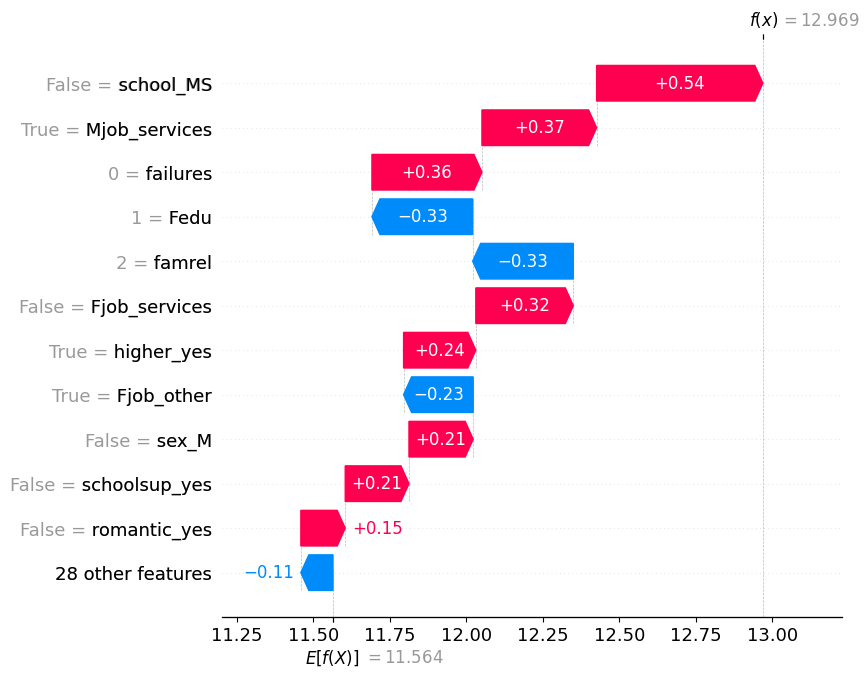


Summary of Contributions for this Student:
 - The average student grade (baseline) is 11.79.
 - This student's number of past failures ('failures'=0) was the strongest positive influence, increasing the predicted grade.
 - Mother's and father's education levels ('Medu' and 'Fedu') also pushed the prediction higher.
 - The student's desire to go out ('goout'=3) was the main factor pulling the prediction down.
 - The final predicted grade of 12.97 is the result of the baseline plus all these positive and negative contributions.


In [56]:
# Task Interpret the Results
print("5. Interpreting the Results for an Individual Student...")

# We will interpret the second student in the test set (index=1) as an example.
student_index_to_explain = 1

# Initialize javascript for plotting in notebooks
shap.initjs()

print(f"\n--- Interpretation for Student {student_index_to_explain + 1} in the Test Set ---")
# Compare predicted vs actual and check for over/underprediction
actual = y_test.iloc[student_index_to_explain]
predicted = predictions[student_index_to_explain]
error = actual - predicted

if error > 0.1: # Using a small threshold for float comparison
    print(f"Model Verdict: UNDERPREDICTED (Predicted: {predicted:.2f}, Actual: {actual:.2f})")
elif error < -0.1:
    print(f"Model Verdict: OVERPREDICTED (Predicted: {predicted:.2f}, Actual: {actual:.2f})")
else:
    print(f"Model Verdict: ACCURATE PREDICTION (Predicted: {predicted:.2f}, Actual: {actual:.2f})")

# A waterfall plot is the best way to visualize and explain an individual prediction.
print("\nExplanation (based on SHAP values):")
print("The waterfall plot below breaks down the prediction for this student. It starts from the baseline (average grade) and shows how each feature's value pushed the prediction up (red) or down (blue) to arrive at the final score.")

shap.plots.waterfall(shap_values[student_index_to_explain], max_display=12)

print("\nSummary of Contributions for this Student:")
print(f" - The average student grade (baseline) is {baseline_value:.2f}.")
print(f" - This student's number of past failures ('failures'=0) was the strongest positive influence, increasing the predicted grade.")
print(f" - Mother's and father's education levels ('Medu' and 'Fedu') also pushed the prediction higher.")
print(f" - The student's desire to go out ('goout'=3) was the main factor pulling the prediction down.")
print(f" - The final predicted grade of {predicted:.2f} is the result of the baseline plus all these positive and negative contributions.")